# DSP - Aufgabenblatt 11

## Bewertete Übung

#### FHNW - HS2019

#### Vorgaben für die Zusammenarbeit

Sie dürfen für die Lösung der Übung zusammenarbeiten, so lange sich ihre **Zusammenarbeit auf konzeptionelle und algorithmische Fragestellungen beschränkt**. Bei kopiertem Code oder Text (von Mitstudierenden oder dem Internet) werden alle Lösungen der beteiligten Parteien mit 0 Punkten bewertet. Dazu werden alle Lösungen manuell und automatisiert auf Kopien untersucht.  

#### Abgabe

Arbeiten Sie auf einem eigenen Fork des Repositories `https://gitlab.fhnw.ch/ml/courses/dsp/dsp_hs2019.git` zu welchem Sie den Dozenten (@michael.graber) als *Maintainer* hinzufügen. Committen Sie regelmässig. Als Abgabe gilt ihr **letzter Commit vor Montag, 23. Dezember 2019, 24 Uhr**.

#### Hinweise
- Der *Code* muss von Anfang bis Ende durchlaufen. Es wird nur Code bewertet, welcher beim automatischen Durchlaufen ausgeführt wird.    
- Beschriften Sie sämtliche Achsen (Bezeichnung und Einheit wenn möglich).  
- Ergänzen Sie den Plot mit zusätzlicher Beschriftung falls dies zum Verständnis des Plots notwendig ist.  
- Wenn Sie einen Plot in einer Antwort diskutieren, beginnen Sie mit einer Beschreibung dessen was der Plot zeigt.  


- Sämtliche Variablen die in einer von Ihnen definierten Funktionen verwendet werden, müssen als Argumente übergeben  oder innerhalb der Funktion definiert werden.
- Selbst definierte Funktionen müssen einen (kurzen) docstring haben.


- Versuchen Sie eine kompakte und performante Implementierung zu finden. Vollständige Punktzahl erreichen Sie bloss mit performantem *Code*.  
- Verwenden Sie dazu, wo immer möglich und sinnvoll, Funktionen aus `pandas` und `numpy`.
- Vermeiden Sie *Loops* falls möglich.

Am 14. April 1912 ist die Titanic vor der Küste Neufundlands auf ihrer Jungfernfahrt mit einem Eisberg kollidiert und sank kanpp 3 Stunden später in den frühen Morgenstunden des 15. Aprils. Von den ca 2224 Passagieren und Crewmitgliedern starben rund 1500.  

Auf der Website https://www.encyclopedia-titanica.org/ können Passagier- und Crewlisten runtergeladen werden. Ich habe Ihnen zwei Dateien bereitgestellt: 'data/titanic_survivors.csv' und 'data/titanic_victims.csv'. Sie beinhalten jeweils die Überlebenden und Opfer des Unglücks.  

Wir werden in dieser Übung die Personen hinter diesem Unglück miteinander untersuchen.

### Aufgabe 1 (10 Punkte)  

Schreiben Sie eine Funktion, mit welcher Sie die beiden Dateien laden und präprozessieren können.  

Die Funktion soll ein `DataFrame` zurückgeben mit folgenden Spalten: `'name', 'sex', 'age', 'is_adult', 'job', 'class_dept', 'is_passenger', 'joined', 'boat_body', 'ticketprice', 'survived',`.  


- Der Ticketpreis steht bei Passagieren jeweils auf der folgenden Zeile im Feld `Ticket`. Extrahieren Sie Pfund, Shilling und Pence mittels *regular expression-matching* auf dem `DataFrame`.
- Berechnen Sie einen Dezimalbetrag in Pfund gemäss dem folgenden Satz: *'There were 12 pence in a shilling and 20 shillings in a pound.'* 
- Leiten Sie das Geschlecht `sex` aus dem Namen, insbesondere aus der Anrede, ab. Finden Sie einen geeignete `pandas`-Methode für das *Mapping*.
- Berechnenen Sie das Alter für alle Personen in Jahren (`m` steht für *months*).
- `is_passenger` soll `True` sein, falls `class_dept` in `['1st Class Passenger', '2nd Class Passenger', '3rd Class Passenger',]` ist.  
- Sortieren Sie das `DataFrame` nach dem Familiennamen.

Jeder *for-Loop* gibt 2 Punkte Abzug.  

Laden Sie die Daten und geben Sie die ersten 10 Zeilen aus.

In [136]:
# imports
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
titanic_victims_df = '../../data/titanic_victims.csv'
titanic_survivors_df = '../../data/titanic_survivors.csv'

To do:

- Berechnen Sie einen Dezimalbetrag in Pfund
- Richtige Anzahl Female and Male? Sonderfall beachten?

In [141]:
def cleanFile(df_1, df_2):
    """
    Hello this is a doc
    """ 
    #load data
    df_1 = pd.read_csv(df_1, skiprows=5, sep=',', usecols=range(7))
    df_2 = pd.read_csv(df_2, skiprows=5, sep=',', usecols=range(7))
    
    #Shift ticketprice and drop unused row
    df_1.insert(3, 'Ticketprice', np.NaN)
    ticket_prices = df_1.loc[df_1['Ticket'].str.contains('£|s|d') == True, ['Ticketprice']] = df_1['Ticket']
    df_1['Ticketprice'] = df_1['Ticketprice'].shift(-1)
    df_1 = df_1.dropna(subset=['Name'])
    
    df_2.insert(3, 'Ticketprice', np.NaN)
    ticket_prices = df_2.loc[df_2['Ticket'].str.contains('£|s|d') == True, ['Ticketprice']] = df_2['Ticket']
    df_2['Ticketprice'] = df_2['Ticketprice'].shift(-1)
    df_2 = df_2.dropna(subset=['Name'])
    
    # drop not neccassary row with NaN
    df_1 = df_1.dropna(subset=['Name'])
    df_2 = df_2.dropna(subset=['Name']) 
    
    #create new column for survived
    df_1.insert(8, 'Survived', False)
    df_2.insert(8, 'Survived', True)
    
    #Merge two files
    frames = [df_1, df_2]
    result_df = pd.concat(frames, ignore_index=True, sort=False)
    
    #drop Ticket
    result_df = result_df.drop(columns=['Ticket'])
    
    
    #Rename columns
    result_df.rename(columns={'Name': 'name', 'Age': 'age', 'Class/Dept': 'class_dept', 'Ticketprice': 'ticketprice', 'Joined': 'joined',
                       'Job': 'job', 'Boat [Body]': 'boat_body', 'Survived': 'survived'}, inplace=True)

    
    # Calculate a decimal amount in pounds
    result_df.insert(4, 'pound', np.NaN)
    result_df.insert(5, 'shilling', np.NaN)
    result_df.insert(6, 'pence', np.NaN)
    
    result_df['pound'] = result_df['ticketprice'].str.extract(pat = '£(\d*)')
    result_df['shilling'] = result_df['ticketprice'].str.extract(pat = '(\d*)s')
    result_df['pence'] = result_df['ticketprice'].str.extract(pat = '(\d*)d')
    
    #Replace Nan-Values
    values = {'job':'unknown', 'boat_body':'unknown', 'pound': 0, 'shilling': 0, 'pence': 0}
    result_df = result_df.fillna(value=values)
    
    result_df['ticketprice'] = result_df['pound'].astype('float64') + result_df['shilling'].astype('float64') / 20 + result_df['pence'].astype('float64') / 240
    
    #clean Age column with years (m=months)
    result_Age = result_df.loc[result_df['age'].str.contains('m') == True, ['age']] = round((1/12) * result_df['age'].str.split('m').str[0].astype('float64'), 1)
    
    #insert new columns
    result_df.insert(1, 'sex', np.NaN)
    result_df.insert(3, 'is_adult', np.NaN)
    result_df.insert(4, 'is_passenger', np.NaN)
    
    # Give is_Adult values
    result_df['age']= result_df['age'].astype(float)
    is_adult = result_df.loc[result_df['age'] > 17, ['is_adult']] = True
    is_adult = result_df.loc[result_df['age'] < 18, ['is_adult']] = False
    #result_df['is_adult'] = result_df.loc[result_df['age'] < 18, ['is_adult']] == False
    
    
    # is_passenger soll True sein, falls class_dept in ['1st Class Passenger', '2nd Class Passenger', '3rd Class Passenger',] ist.
    result_df['is_passenger'] = result_df['class_dept'].isin(['1st Class Passenger', '2nd Class Passenger', '3rd Class Passenger'])
    
    # split name for salutation
    result_df.insert(0, 'salutation', np.NaN)
    result_df['salutation'] = result_df['name'].str.split(',', n=1, expand = False).str[1]
    result_df['salutation'] = result_df['salutation'].str.split(' ', n=1, expand = False).str[0]
    result_df['salutation'] = result_df['salutation'].str.extract(pat = '([A-Z][a-z]*)')
    
    
    # Mapping for sex
    result_df['sex'] = result_df['salutation'].map({'Mr': 'Male', 'Master': 'Male', 'Major': 'Male', 'Dr': 'Male', 'Sig': 'Male', 'Colonel': 'Male',
                                                      'Revd': 'Male', 'Fr': 'Male', 'Rev': 'Male', 'Captain': 'Male', 'Sr': 'Male', 'Don': 'Male', 
                                                      'Col': 'Male', 'Sir': 'Male', 'Mme': 'Female', 'Lucy':'Female', 'Sra': 'Female', 
                                                      'Mlle': 'Female', 'Mrs': 'Female', 'Miss': 'Female', 'Do': 'Female', 'Ms': 'Female'})
    
    # Mapping for sex special case Alice May
    result_df.loc[result_df.name.str.contains('Alice May') == True, ['sex']] = 'Female'
    
    # delete not needed column salutation
    result_df = result_df.drop(columns=['salutation', 'pound', 'shilling', 'pence'])
    
    # sort dataframe --> familyname
    cleaned_result_df = result_df.sort_values(by=['name'], ascending=True)
    cleaned_result_df.to_csv('titanic.csv')
    #print(cleaned_result_df['sex'].value_counts())
    #print(len(cleaned_result_df))
    
    
    return cleaned_result_df

In [139]:
titanic_df = cleanFile(titanic_victims_df, titanic_survivors_df)
titanic_df.head(10)

,name,sex,age,is_adult,is_passenger,class_dept,ticketprice,joined,job,boat_body,survived
0,"ABBING, Mr Anthony",Male,41.0,True,True,3rd Class Passenger,7.550,Southampton,Blacksmith,unknown,False
1496,"ABBOTT, Mrs Rhoda Mary 'Rosa'",Female,39.0,True,True,3rd Class Passenger,20.250,Southampton,unknown,A,True
3,"ABBOTT, Mr Ernest Owen",Male,21.0,True,False,Victualling Crew,0.000,Southampton,Lounge Pantry Steward,unknown,False
2,"ABBOTT, Mr Eugene Joseph",Male,13.0,False,True,3rd Class Passenger,20.250,Southampton,Scholar,unknown,False
1,"ABBOTT, Mr Rossmore Edward",Male,16.0,False,True,3rd Class Passenger,20.250,Southampton,Jeweller,[190],False
1497,"ABELSETH, Miss Karen Marie",Female,16.0,False,True,3rd Class Passenger,7.650,Southampton,unknown,16,True
1498,"ABELSETH, Mr Olaus Jørgensen",Male,25.0,True,True,3rd Class Passenger,7.650,Southampton,Farmer,A,True
1499,"ABELSON, Mrs Anna",Female,24.0,True,True,2nd Class Passenger,24.000,Cherbourg,unknown,10,True
4,"ABELSON, Mr Samuel",Male,30.0,True,True,2nd Class Passenger,24.000,Cherbourg,unknown,unknown,False
1500,"ABRAHAMSSON, Mr August Abraham Johannes",Male,19.0,True,True,3rd Class Passenger,7.925,Southampton,unknown,15,True


### Aufgabe 2 (8 Punkte)

Wieviele Personen sind es insgesamt?  

Wieviele Personen ohne Ticketpreis?  

Wieviele Personen ohne Altersangabe?  

Wieviele Personen männlichen und weiblichen Geschlechts fanden sich gemäss unserem Datensatz auf der Titanic?  

Wie viele Kinder, welchen Geschlechts?  

Was war der durchschnittliche Preis für eine Fahrkarte?  

Was war das Durchschnittsalter der Besatzungsmitglieder? Was war das Durchschnittsalter der Passagiere?

In [135]:
# Wieviele Personen sind es insgesamt?
print('Es sind insgesamt', len(titanic_df['is_passenger']), 'Personen')

# Wieviele Personen ohne Ticketpreis?
print('Es gibt insgesamt', titanic_df['ticketprice'].isna().sum(), 'Personen ohne Tickets')
print('Es gibt insgesamt', (titanic_df['ticketprice']== 0.0).sum(), 'Personen ohne Tickets')

# Wieviele Personen ohne Altersangabe?
print('Es gibt insgesamt', titanic_df['is_adult'].isna().sum(), 'Personen die keine Altersangabe haben')
print('--------------------------------------------')

# Wieviele Personen männlichen und weiblichen Geschlechts fanden sich gemäss unserem Datensatz auf der Titanic?
print('Anzahl Frauen und Männer: ', titanic_df['sex'].value_counts())
print('--------------------------------------------')

# Wie viele Kinder, welchen Geschlechts? 
children = titanic_df.loc[titanic_df['is_adult'] == False]
print('Es gibt insgesamt', children['is_adult'].count(), 'Kinder')
print('Anzahl Mädchen und Jungs auf der Titanic:', children.groupby(['sex']).count().age)
print('--------------------------------------------')

# Was war der durchschnittliche Preis für eine Fahrkarte?
mean = titanic_df['ticketprice'].mean()
print('Der Durchschnittliche Ticketpreis für eine Fahrkarte war:', '{:.2f}'.format(mean), 'Pfund')

#Was war das Durchschnittsalter der Besatzungsmitglieder?
array_staff = ['Engineering Crew', 'Restaurant Staff', 'Victualling Crew', 'Deck Crew']
staff_result= titanic_df[titanic_df.class_dept.isin(array_staff)]
staff = staff_result.groupby(['class_dept']).mean().age.mean()
print('Das Durchschnittsalter der Besatzungsmitglieder ist:', '{:.2f}'.format(staff), 'Jahre')

#Was war das Durchschnittsalter der Passagiere?
array_passenger = ['3rd Class Passenger', '1st Class Passenger', '2nd Class Passenger']
passenger_result= titanic_df[titanic_df.class_dept.isin(array_passenger)]
passenger = passenger_result.groupby(['class_dept']).mean().age.mean()
print('Das Durchschnittsalter der Passagiere ist:', '{:.2f}'.format(passenger), 'Jahre')

#itanic_df.head(5)

Es sind insgesamt 2208 Personen
Es gibt insgesamt 0 Personen ohne Tickets
Es gibt insgesamt 917 Personen ohne Tickets
Es gibt insgesamt 3 Personen die keine Altersangabe haben
--------------------------------------------
Anzahl Frauen und Männer:  Male      1719
Female     489
Name: sex, dtype: int64
--------------------------------------------
Es gibt insgesamt 203 Kinder
Anzahl Mädchen und Jungs auf der Titanic: sex
Female     82
Male      121
Name: age, dtype: int64
--------------------------------------------
Der Durchschnittliche Ticketpreis für eine Fahrkarte war: 19.74 Pfund
Das Durchschnittsalter der Besatzungsmitglieder ist: 30.85 Jahre
Das Durchschnittsalter der Passagiere ist: 31.42 Jahre


### Aufgabe 3 (3 Punkte)

Erstellen Sie eine Kreuztabelle von Einstiegsort und `class_dept`.  

Visualisieren Sie die Tabelle.  
Wir wissen, dass die Titanic von *Belfast*, wo sie gebaut wurde, nach *Southhampton*, nach *Cherbourg* und dann nach *Queenstown* fuhr, bevor Sie zur Atlantiküberfahrt auslief.  

Diskutieren Sie Ihre Erkenntnisse.

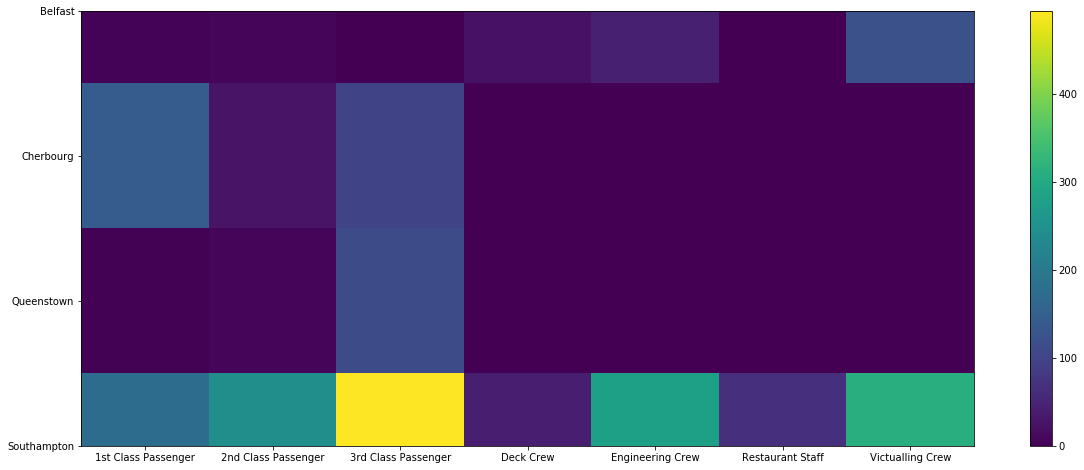

In [96]:
# Create crosstable
pd.crosstab(titanic_df['joined'], titanic_df['class_dept']) # Reihenfolge?
ct = pd.crosstab(titanic_df['joined'], titanic_df['class_dept']) # Reihenfolge?
fig, ax = plt.subplots(figsize=(20, 8))
im = ax.imshow(ct.values, aspect='auto')
_ = ax.set_xticks(range(len(ct.columns)))
_ = ax.set_xticklabels(ct.columns)
_ = ax.set_yticks(range(len(ct.index)))
_ = ax.set_yticklabels(ct.index)
_ = plt.colorbar(im)

Antwort zur Kreuztabelle

### Aufgabe 4 (5 Punkte)

Visualisieren Sie die Altersverteilung für die beiden Geschlechter und gleichzeitig für Variable `class_dept` mit Boxplots.  

Diskutieren Sie die Visualisierung.
- Erklären Sie was ein Boxplot zeigt.
- Was für Information fehlt?
- Was können wir zu den vorliegenden Daten aus dieser Darstellung lesen?

In [ ]:
#boxplot = titanic_df.boxplot(by='sex')
print(titanic_df.sex.value_counts())
print(titanic_df.class_dept.value_counts())

#titanic_df['age_dist']=titanic_df['sex']+titanic_df['class_dept']
#print(titanic_df.age_dist.value_counts())

#titanic_df['age_dist'] = titanic_df['sex'].combine_first(titanic_df['class_dept'])
#titanic_df['sex'].append(titanic_df['class_dept'], ignore_index=True)
print('------------')
#titanic_df['age_dist']=titanic_df['sex'].apply(titanic_df['class_dept'])
#print(titanic_df.sex)

#pd.concat([df1['WM'].append(df1['WL']

mixed = []


In [ ]:
titanic_df.boxplot(by=['age_dist'], column='age', figsize=(32,10))

In [ ]:
titanic_df.boxplot(by=['class_dept'], column='age', figsize=(24,8))

In [ ]:
titanic_df.boxplot(by=['sex'], column='age', figsize=(12,6))

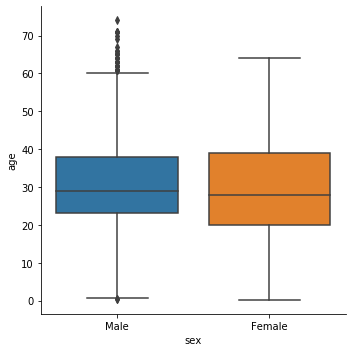

In [115]:
y = titanic_df['age'].count()
x = titanic_df['sex']
_ = sns.catplot(data=titanic_df, x='sex', y='age', kind='box')

In [ ]:
#dd = pd.melt(titanic_df,id_vars=['age'],value_vars=['sex','class_dept'],var_name='age')
#sns.boxplot(x='Group',y='value',data=dd,hue='age')

YOUR ANSWER HERE

### Aufgabe 5 (4 Punkte)

Zeichnen Sie die Verteilung des Alters sämtlicher Passagiere als Histogramm.  

Beschreiben Sie die Verteilung bezüglich Lage, Streuung und Form.  

Sie dürfen verschiedene Ansätze verwenden und deren Resultate und Eigenschaften diskutieren.

Standardabweichung der Visualisierung: 12.22
Maximal Alter: 74.0
Minimal Alter: 0.2
Spannweite von Altersverteilung: 73.8


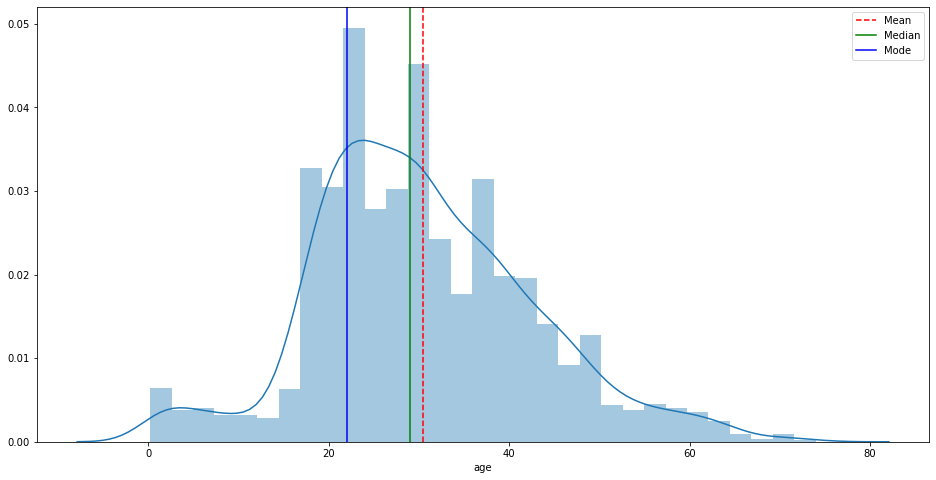

In [152]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

fig, ax = plt.subplots(figsize=(16,8))
_ = sns.distplot(titanic_df['age'], kde=True, bins='fd')

# Lage der Verteilung
mean=titanic_df['age'].mean()
median=titanic_df['age'].median()
mode=titanic_df['age'].mode().get_values()[0]

ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')
ax.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# Streuung der Verteilung
std = titanic_df['age'].std()
print('Standardabweichung der Visualisierung:', '{:.2f}'.format(std))
print('Maximal Alter:',titanic_df['age'].max())
print('Minimal Alter:',titanic_df['age'].min())
print('Spannweite von Altersverteilung:', titanic_df['age'].max() - titanic_df['age'].min())

# Form der Verteilung
# Die Visualisierung hat eine linkssschiefe Verteilung

YOUR ANSWER HERE

### Aufgabe 6 (3 Punkte)

Führen Sie die Schritte aus Aufgabe 5 für den Ticketpreis aus.  

Visualisieren Sie zusätzlich die kumulative Verteilung.  

Diskutieren Sie Ihre Erkenntnisse.

Standardabweichung der Visualisierung: 43.26
Maximaler Ticketpreis: 512.33
Minimaler Ticketpreis: 0.00
Spannweite von Ticketpreisverteilung: 512.33


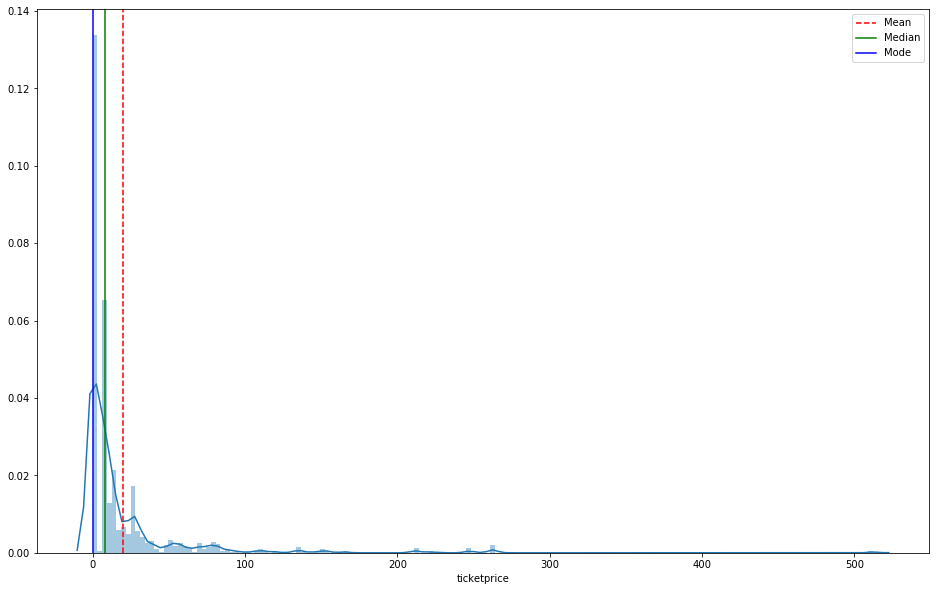

In [140]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

fig, ax = plt.subplots(figsize=(16,10))
_ = sns.distplot(titanic_df['ticketprice'], kde=True, bins='fd')

# Lage der Verteilung
mean=titanic_df['ticketprice'].mean()
median=titanic_df['ticketprice'].median()
mode=titanic_df['ticketprice'].mode().get_values()[0]

ax.axvline(mean, color='r', linestyle='--')
ax.axvline(median, color='g', linestyle='-')
ax.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

# Streuung der Verteilung
std = titanic_df['ticketprice'].std()
max_ticket = titanic_df['ticketprice'].max()
min_ticket = titanic_df['ticketprice'].min()
print('Standardabweichung der Visualisierung:', '{:.2f}'.format(std))
print('Maximaler Ticketpreis:', '{:.2f}'.format(max_ticket))
print('Minimaler Ticketpreis:', '{:.2f}'.format(min_ticket))
print('Spannweite von Ticketpreisverteilung:', '{:.2f}'.format(max_ticket - min_ticket))

# Form der Verteilung
counts, bins = np.histogram(x, bins='fd')# Die Visualisierung hat eine Heavy-Tail-Verteilung welche linksschief ist???

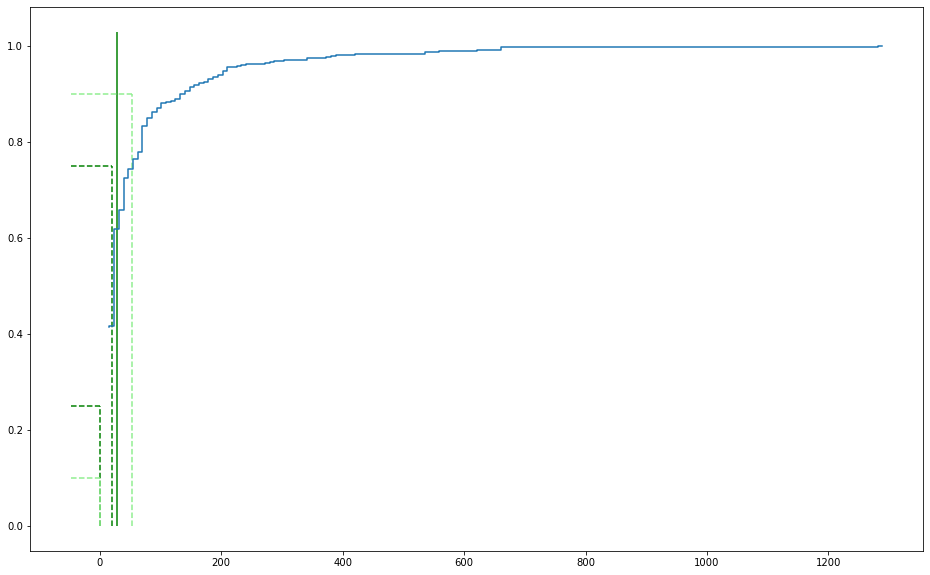

In [154]:
mu = 8.
sigma = 2.5
x = mu + titanic_df['ticketprice'] *sigma
counts, bins = np.histogram(x, bins='fd')
mean = x.mean()
std = x.std()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16, 10))

quart_l, quart_u = np.percentile(titanic_df['ticketprice'], [25, 75])
quant_10, quant_90 = np.percentile(titanic_df['ticketprice'], [10, 90])


_ = ax.step(bins[1:], (counts/counts.sum()).cumsum())
ymax = ax.get_ylim()[1]
xmin, xmax = ax.get_xlim()
# quartiles
_ = ax.vlines(median, 0, ymax, color='green', label='median')
_ = ax.vlines(quart_l, 0, 0.25, color='green', linestyle='--',
label='quartiles')
_ = ax.hlines(0.25, xmin, quart_l, color='green', linestyle='--')
_ = ax.vlines(quart_u, 0, 0.75, color='green', linestyle='--')
_ = ax.hlines(0.75, xmin, quart_u, color='green', linestyle='--')
# quantiles
_ = ax.vlines(quant_10, 0, 0.1, color='lightgreen', linestyle='--',
label='quantiles')
_ = ax.hlines(0.1, xmin, quant_10, color='lightgreen', linestyle='--')
_ = ax.vlines(quant_90, 0, 0.9, color='lightgreen', linestyle='--')
_ = ax.hlines(0.9, xmin, quant_90, color='lightgreen', linestyle='--')
#_ = ax.set_

YOUR ANSWER HERE

### Aufgabe 7 (3 Punkte)

Was sind die häufigsten 10 Berufe der Passagiere, welche oberhalb des $Q_{0.9}$-Quantils des Ticketpreises liegen?  

Was sind die häufigsten 10 Berufe der Passagiere, welche unterhalb des $Q_{0.1}$-Quantils des Ticketpreises liegen?  

Wie oft kommen die Berufe jeweils vor?  
Wie interpretieren Sie das Resultat?

In [130]:
y = titanic_df['ticketprice']
x = titanic_df['job'].value_counts(ascending=False)

quant_10, quant_90 = np.percentile(x, [10, 90])

print(quant_10, quant_90)
#_ = sns.catplot(data=titanic_df, x='job', y='ticketprice', kind='box')

1.0 6.0


YOUR ANSWER HERE

### Aufgabe 8 (6 Punkte)

Finden Sie ein paar wenige Visualisierungen, welche es ermöglichen, kompakt einen Eindruck zu bekommen, wer das Unglück der Titanic am wahrscheinlichsten überlebt hat.  

Was ist ihre Erkenntnis?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE

### Aufgabe 9 (6 Punkte)

Untersuchen Sie nun, ob das Alter einen Einfluss auf die Überlebenswahrscheinlichkeit hatte.  

Teilen Sie die Passagiere dazu in Gruppen von Geschlecht und Altersjahrzenten ein.  
Berechnen Sie für die jeweiligen Gruppen den Anteil der Überlebenden, sowie den [*Standard Error of the Mean* (SEM)](https://en.wikipedia.org/wiki/Standard_error).  

Visualisieren Sie die Resultate übersichtlich und diskutieren Sie diese.  
Was können wir durch die Visualisierung des SEM erkennen?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE